In [1]:
import matplotlib.pyplot as plt
import ocelot

from cheetah import (
    BPM,
    Drift,
    HorizontalCorrector,
    ParameterBeam,
    ParticleBeam,
    Screen,
    Segment,
    VerticalCorrector,
)


[INFO    ] : : beam.py: module NUMBA is not installed. Install it to speed up calculation


math_op.py: module Numba is not installed. Install it if you want speed up correlation calculations


[INFO    ] : : high_order.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] : : : : : : : : : : : radiation_py.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.
[INFO    ] csr.py: module NUMEXPR is not installed. Install it to speed up calculation
[INFO    ] wake3D.py: module NUMBA is not installed. Install it to speed up calculation


initializing ocelot...
import: module NUMBA is not installed. Install it to speed up calculation
import: module PYFFTW is not installed. Install it to speed up calculation
import: module NUMEXPR is not installed. Install it to speed up calculation


### Accelerator Segments

Let's start with a very simple example creating a small lattice and tracking a beam through it.

In [2]:
# Create the lattice (which we call segment)
segment = Segment(
    [
        BPM(name="BPM1SMATCH"),
        Drift(length=1.0),
        BPM(name="BPM6SMATCH"),
        Drift(length=1.0),
        VerticalCorrector(length=0.3, name="V7SMATCH"),
        Drift(length=0.2),
        HorizontalCorrector(length=0.3, name="H10SMATCH"),
        Drift(length=7.0),
        HorizontalCorrector(length=0.3, name="H12SMATCH"),
        Drift(length=0.05),
        BPM(name="BPM13SMATCH"),
    ]
)


In [3]:
# Have a look at it
segment


Segment([BPM(name="BPM1SMATCH"), Drift(length=1.00, name="Drift_000001"), BPM(name="BPM6SMATCH"), Drift(length=1.00, name="Drift_000003"), VerticalCorrector(length=0.30, angle=0.0, name="V7SMATCH"), Drift(length=0.20, name="Drift_000005"), HorizontalCorrector(length=0.30, angle=0.0, name="H10SMATCH"), Drift(length=7.00, name="Drift_000007"), HorizontalCorrector(length=0.30, angle=0.0, name="H12SMATCH"), Drift(length=0.05, name="Drift_000009"), BPM(name="BPM13SMATCH")])

Elements such as magnets can be accessed by their name. If you didn't pass a name, they will be named automatically to something like `BPM_001`.

In [4]:
segment.V7SMATCH


VerticalCorrector(length=0.30, angle=0.0, name="V7SMATCH")

You can use this to change a magnets strength, for example.

In [5]:
segment.V7SMATCH.angle = 1e-4


### Beams

In [6]:
# Create a beam
beam_1 = ParticleBeam.from_parameters(n=10_000)


In [7]:
# Look at it
beam_1


ParticleBeam(n=10000, mu_x=-0.000000, mu_xp=0.000000, mu_y=0.000000, mu_yp=-0.000000, sigma_x=0.000000, sigma_xp=0.000000, sigma_y=0.000000, sigma_yp=0.000000, sigma_s=0.000001, sigma_p=0.000001, energy=100000000.000)

In [8]:
# Now do the actual tracking ... out is the beam that you get after tracking through the lattice
out = segment(beam_1)
out


ParticleBeam(n=10000, mu_x=0.000000, mu_xp=0.000000, mu_y=0.000785, mu_yp=0.000100, sigma_x=0.000002, sigma_xp=0.000000, sigma_y=0.000002, sigma_yp=0.000000, sigma_s=0.000001, sigma_p=0.000001, energy=100000000.000)

Actually, there are two types of beam: `ParticleBeam` and `ParameterBeam`. Particle beam actually simulations loads of single particles. Parameter Beam decribes the beam as a gaussian distribution of particles. By doing this, a Parameter Beam can be tracked much faster, but is also less accurate.

In [9]:
beam_2 = ParameterBeam.from_parameters()
beam_2


ParameterBeam(mu_x=0.000000, mu_xp=0.000000, mu_y=0.000000, mu_yp=0.000000, sigma_x=0.000000, sigma_xp=0.000000, sigma_y=0.000000, sigma_yp=0.000000, sigma_s=0.000001, sigma_p=0.000001, energy=100000000.000)

In [10]:
out = segment(beam_2)
out


ParameterBeam(mu_x=0.000000, mu_xp=0.000000, mu_y=0.000785, mu_yp=0.000100, sigma_x=0.000002, sigma_xp=0.000000, sigma_y=0.000002, sigma_yp=0.000000, sigma_s=0.000001, sigma_p=0.000001, energy=100000000.000)

### Diagnostics

Cheetah supports diagnostics like screens and BPMs.

In [11]:
segment_2 = Segment(
    [
        Drift(length=1.0),
        BPM(name="my_bpm"),
        Drift(length=1.0),
        Screen(name="my_screen", resolution=(100, 100), pixel_size=(3e-6, 3e-6)),
        Drift(length=1.0),
    ]
)


In [12]:
segment_2.my_bpm


BPM(name="my_bpm")

In [13]:
segment_2.my_screen


Screen(resolution=(100, 100), pixel_size=(3e-06, 3e-06), binning=1, misalignment=(0, 0), name="my_screen")

Because screens and BPMs may be expensive to compute, they need to be activated. NOTE that an activated screen also blocks the beam just like it would in the real world.

In [14]:
# With the BPM active, you can get a reading from it, but the beam also still appears at the end of the lattice.
segment_2.my_bpm.is_active = True
out = segment_2(beam_1)

print(f"{out = }")
print(f"{segment_2.my_bpm.reading = }")


out = ParticleBeam(n=10000, mu_x=-0.000000, mu_xp=0.000000, mu_y=-0.000000, mu_yp=-0.000000, sigma_x=0.000001, sigma_xp=0.000000, sigma_y=0.000001, sigma_yp=0.000000, sigma_s=0.000001, sigma_p=0.000001, energy=100000000.000)
segment_2.my_bpm.reading = (-8.465952938685462e-10, 5.219794041444459e-10)


In [15]:
# If we now also activate the screen, we can get a reading from it, too, but there will be now beam at the end of the lattice
segment_2.my_screen.is_active = True
out = segment_2(beam_1)

print(f"{out = }")
print(f"{segment_2.my_screen.reading = }")


out = "I'm an empty beam!"
segment_2.my_screen.reading = tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


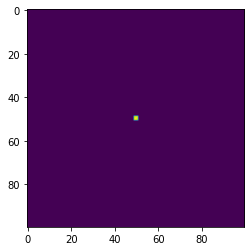

In [16]:
# A screen reading is basically an image, so you can display it
plt.imshow(segment_2.my_screen.reading)
plt.show()


### Compatibility with other simulation codes

Most lattices and particle distributions are available in formats from simulation codes like Ocelot and Astra. So we added ways to easily load them.

In [17]:
# The ARES lattice is defined using Ocelot in ARESlatticeStage3v1_9.py. We can load is as a Cheetah segment like so. Note that the warnings are presented because Cheetah simulates the pixels of a screen, which Ocelot cannot do. Therefore, things like resolution and pixel size are not defined in the Ocelot lattice and Cheetah uses default values when converting.
import ARESlatticeStage3v1_9 as ares

ares_segment = Segment.from_ocelot(ares.cell)
ares_segment

Segment([Drift(length=0.00, name="ARLISOLG1"), Drift(length=0.20, name="Drift_ARLISOLG1"), Drift(length=0.09, name="ARLIMSOG1"), Drift(length=0.09, name="ARLIMSOG1"), Drift(length=0.17, name="Drift_ARLIMSOG1p"), HorizontalCorrector(length=0.00, angle=0.0, name="ARLIMCXG1"), VerticalCorrector(length=0.00, angle=0.0, name="ARLIMCXG1"), Drift(length=0.19, name="Drift_ARLIMCVG1"), Drift(length=0.00, name="ARLIBSCL1"), Drift(length=0.14, name="Drift_ARLIBSCL1"), Drift(length=0.00, name="ARLIBAML1"), Drift(length=0.30, name="Drift_ARLIBAML1"), Drift(length=0.00, name="ARLIBSCX1"), Drift(length=0.19, name="Drift_ARLIBSCX1"), Drift(length=0.00, name="ARLISLHG1"), Drift(length=0.49, name="Drift_ARLISLHG1"), HorizontalCorrector(length=0.00, angle=0.0, name="ARLIMCXG2"), VerticalCorrector(length=0.00, angle=0.0, name="ARLIMCXG2"), Drift(length=0.06, name="Drift_ARLIMCVG2"), Drift(length=0.00, name="ARLIBCMG1"), Drift(length=0.33, name="Drift_ARLIBCMG1"), Screen(resolution=(2448, 2040), pixel_size

In [18]:
# Similar conversions can be done for beams (both to a ParticleBeam and a ParameterBeam)
astra_beam = ParticleBeam.from_astra("../benchmark/astra/ACHIP_EA1_2021.1351.001")
astra_beam


ParticleBeam(n=100000, mu_x=0.000001, mu_xp=0.000000, mu_y=-0.000002, mu_yp=-0.000000, sigma_x=0.000175, sigma_xp=0.000004, sigma_y=0.000175, sigma_yp=0.000004, sigma_s=0.000008, sigma_p=0.002280, energy=107315902.444)

In [19]:
ocelot_p_array = ocelot.load_particle_array("sc_beam.npz")
ocelot_beam = ParameterBeam.from_ocelot(ocelot_p_array)
ocelot_beam


ParameterBeam(mu_x=0.000000, mu_xp=0.000000, mu_y=0.000000, mu_yp=0.000000, sigma_x=0.000232, sigma_xp=0.000204, sigma_y=0.000232, sigma_yp=0.000204, sigma_s=0.001734, sigma_p=0.002626, energy=6557938.998)

### Plotting

We even have a little plot function that lets you see your beam through the lattice by showing you equally spaces reference particles.

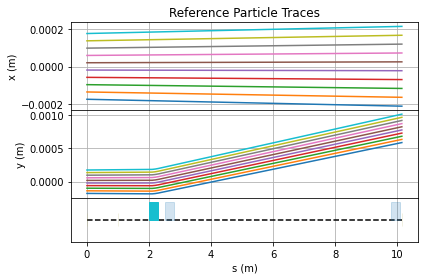

In [20]:
segment.plot_overview(beam=astra_beam)


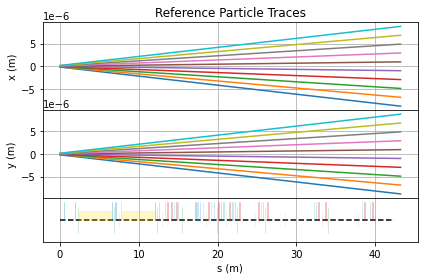

In [21]:
ares_segment.plot_overview()

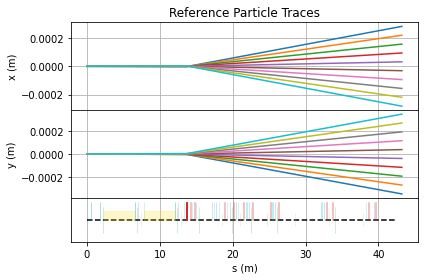

In [22]:
ares_segment.AREAMQZM1.k1 = 30
ares_segment.plot_overview()